In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

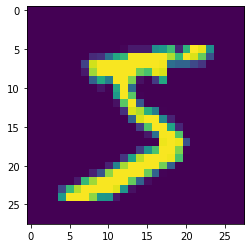

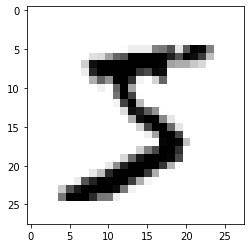

In [5]:
plt.imshow(x_train[0])
plt.show()
#we do not know whether it is colored or not so, use binary
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [6]:
#checking the values of each pixels
#before normalization
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

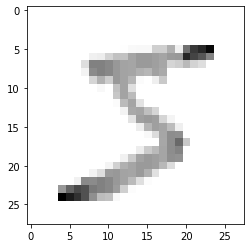

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
#resizing image to make it suitable for applying convolution operation
IMG_SIZE = 28
#increasing one dimension for kernel operation
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
x_testr=np.array(x_test).reshape(-1,IMG_SIZE, IMG_SIZE,1)
print("Training samples dimension", x_trainr.shape)
print("Testing samples dimension", x_testr.shape)


Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [11]:
#creating a deep neural network
model = Sequential()

#first conv layer (60000,28,28,1)  28-3+1=26x26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu")) #adds non-linearity, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling single maximum value of 2x2

#2nd conv layer 26-3+1=24x24
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd conv layer  24-3+1=22x22 but with max pooling size is reduced to almost half
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 
model.add(Flatten()) #2D to 1D conversion
model.add(Dense(64))
model.add(Activation("relu"))

#fully connecected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# last fully connecected layer, output must be equal to number of classes i.e(0-9)
model.add(Dense(10))
model.add(Activation("softmax")) ##gives class probabilities

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [12]:
print("Total trainning samples =",len(x_trainr))

Total trainning samples = 60000


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [14]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 87s 65ms/step - loss: 0.6818 - accuracy: 0.7786 - val_loss: 0.1369 - val_accuracy: 0.9569
Epoch 2/5
1313/1313 [==============================] - 83s 63ms/step - loss: 0.1106 - accuracy: 0.9666 - val_loss: 0.0982 - val_accuracy: 0.9697
Epoch 3/5
1313/1313 [==============================] - 88s 67ms/step - loss: 0.0795 - accuracy: 0.9757 - val_loss: 0.0651 - val_accuracy: 0.9797
Epoch 4/5
1313/1313 [==============================] - 87s 66ms/step - loss: 0.0550 - accuracy: 0.9834 - val_loss: 0.0774 - val_accuracy: 0.9757
Epoch 5/5
1313/1313 [==============================] - 87s 66ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0587 - val_accuracy: 0.9819


if accuracy > val_accuracy then case of overfitting
soln to overfitting is drop out layer


In [15]:
test_loss, test_acc =model.evaluate(x_testr, y_test)
print("Loss:",test_loss)
print("Accuracy:",test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0557 - accuracy: 0.9820
Loss: 0.05574965104460716
Accuracy: 0.9819999933242798


In [16]:
predictions = model.predict([x_testr])


In [17]:
print(np.argmax(predictions[128]))

8


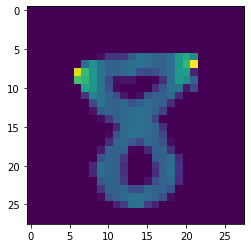

In [18]:
plt.imshow(x_test[128])

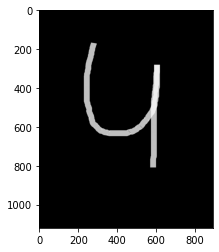

In [91]:
img = cv2.imread('4.png')
plt.imshow(img)

In [92]:
img.shape

(1120, 892, 3)

In [93]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(28,28), interpolation=cv2.INTER_AREA)

In [94]:
gray.shape
resized.shape

(28, 28)

In [95]:
new_img=tf.keras.utils.normalize(resized, axis=1)
new_img = np.array(new_img).reshape(-1, IMG_SIZE, IMG_SIZE,1) #kernel operation of conv layer
my_prediction = model.predict(new_img)

In [96]:
new_img.shape

(1, 28, 28, 1)

In [97]:
print(np.argmax(my_prediction))

4
